## 항공사 항공편 데이터 분석
The record of flight travel details between the cities in india

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
data=pd.read_csv(r"C:\Users\tjwld\Downloads\airlines_flights_data.csv")

In [117]:
data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Cleaning the data

In [ ]:
#remove the index column
data.drop(columns='index',inplace=True)
#inplace: change data

In [119]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [120]:
#Get some info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [121]:
#Get statistical summary about the dataset
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [122]:
data[data['duration']==49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [123]:
data[data['duration']==0.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498
116236,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,11,3498
116322,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,12,3498
116411,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,13,3498
116496,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,14,3498
116656,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,16,1924


In [124]:
data[data['price']==123071.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [125]:
data[data['price']==1105.0000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


In [126]:
data.isnull().sum() #check for the missing value in any column

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Q1. What are the airline in the dataset, accompanied by their frequencies?

In [127]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [128]:
#checking how many airlines are in the dataset
data['airline'].nunique

<bound method IndexOpsMixin.nunique of 0         SpiceJet
1         SpiceJet
2          AirAsia
3          Vistara
4          Vistara
            ...   
300148     Vistara
300149     Vistara
300150     Vistara
300151     Vistara
300152     Vistara
Name: airline, Length: 300153, dtype: object>

In [129]:
#Showing the name of airlines in the dataset
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

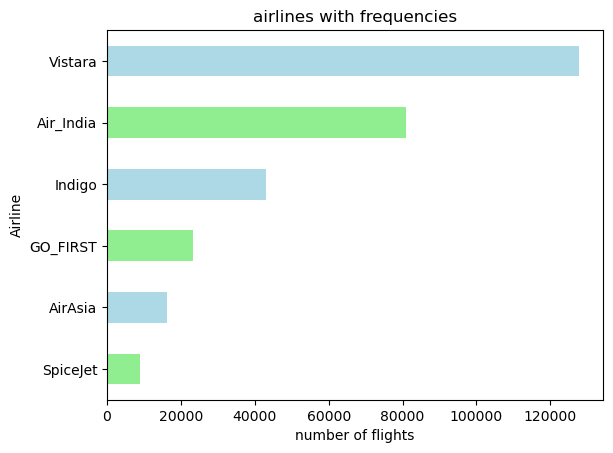

In [130]:
#showing all the airlines with their Number of Flights in horizontal bar Graph
data['airline'].value_counts(ascending=True).plot.barh(color=['lightgreen','lightblue'])
plt.title("airlines with frequencies")
plt.xlabel("number of flights")
plt.ylabel("Airline")
plt.show()

## Q2. show bar graphs representing the departure time and arrival time

In [131]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [183]:
data['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [133]:
data['arrival_time'].value_counts().values

array([91538, 78323, 62735, 38139, 15417, 14001], dtype=int64)

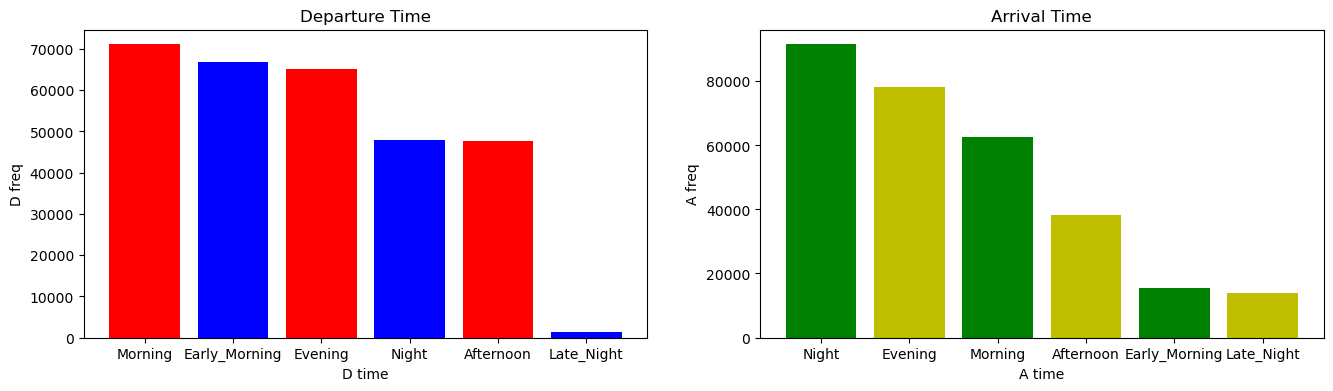

In [134]:
#showing the departure time and arrival time for the flights with their counts
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(data['departure_time'].value_counts().index, data['departure_time'].value_counts().values, color=['r','b'] )
plt.title("Departure Time")
plt.xlabel("D time")
plt.ylabel("D freq")
plt.subplot(1,2,2)
plt.bar(data['arrival_time'].value_counts().index, data['arrival_time'].value_counts().values, color=['g','y'])
plt.title("Arrival Time")
plt.xlabel("A time")
plt.ylabel("A freq")
plt.show()

## Show bat graphs representing the source city and destinaton city

In [135]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [136]:
#showing the source city of flights
data['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [137]:
#showing the Destination city of flights
data['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

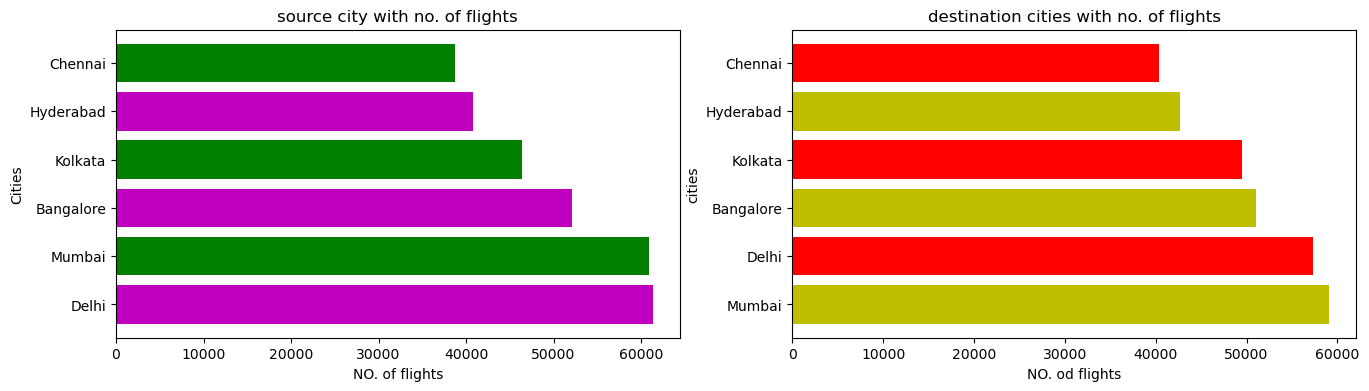

In [138]:
#showing the source city and destination city for the flights with their counts
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.barh(data['source_city'].value_counts().index,data['source_city'].value_counts().values, color=['m','g'])
plt.title("source city with no. of flights")
plt.xlabel('NO. of flights')
plt.ylabel('Cities')
plt.subplot(1,2,2)
plt.barh(data['destination_city'].value_counts().index,data['destination_city'].value_counts().values, color=['y','r'])
plt.title("destination cities with no. of flights")
plt.ylabel("cities")
plt.xlabel("NO. od flights")
plt.show()


## Does price varies with airlines

In [139]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [140]:
#Grouping the airlines and checking their mean price
data.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

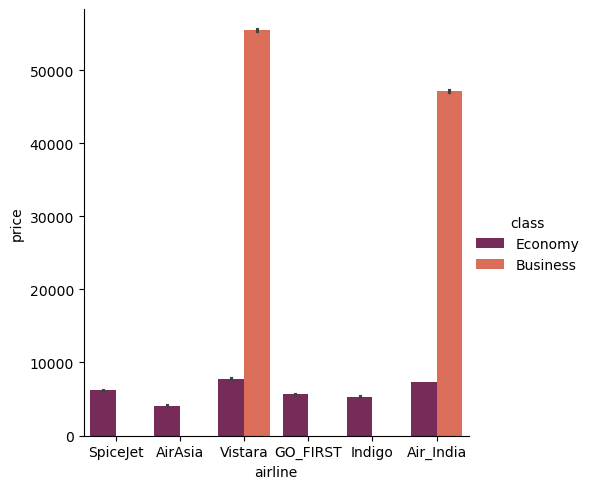

In [ ]:
#Drawing a categorical plot showing the mean ticket price for each Airline
sns.catplot(x='airline',y='price',kind='bar',palette='rocket',data=data, hue='class') #조건부 평균 시각화 price|airline
plt.show()

## Does ticket price change based on the departure time and arrival time

In [142]:
#Checking the mean ticket price based on the Departure Times
data.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [143]:
data.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

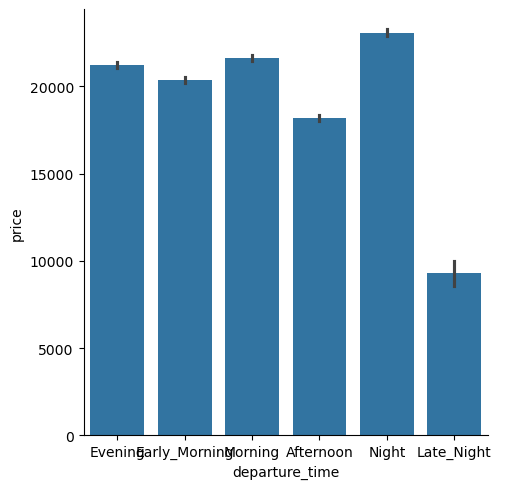

In [144]:
sns.catplot(x='departure_time', y='price', kind='bar', data=data)
plt.show()

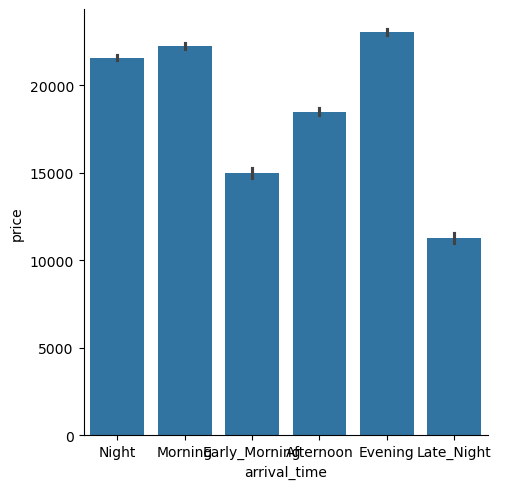

In [145]:
sns.catplot(x='arrival_time', y='price', kind='bar', data=data)
plt.show()

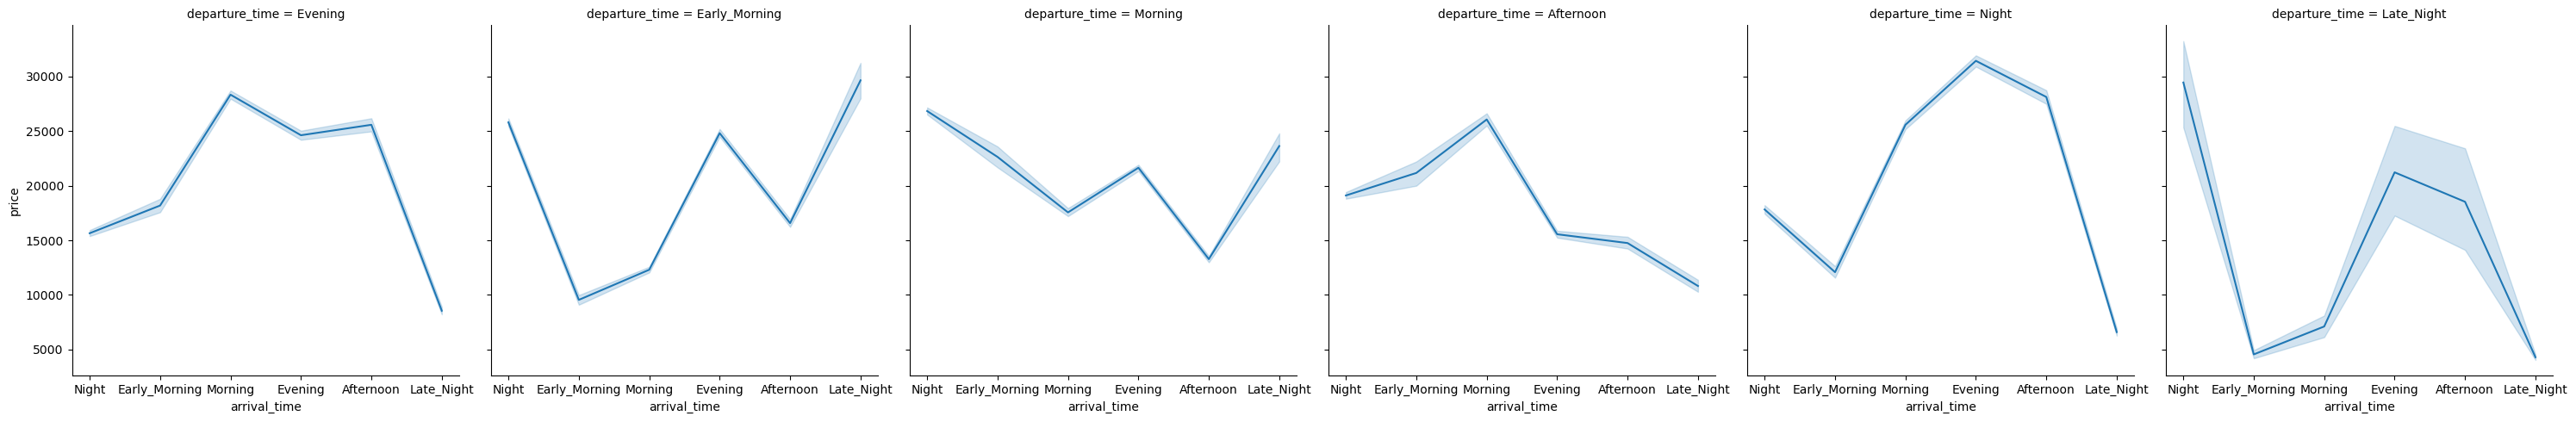

In [ ]:
sns.relplot(x='arrival_time', y='price', data=data, col='departure_time',kind='line')#(price∣arrival_time=t, departure_time=d)
plt.show()

Q6. How the price change in source and destination

In [147]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [148]:
#Checking the mean ticket price for each source xity
data.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [149]:
#checking the mean ticket price for each destination city
data.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

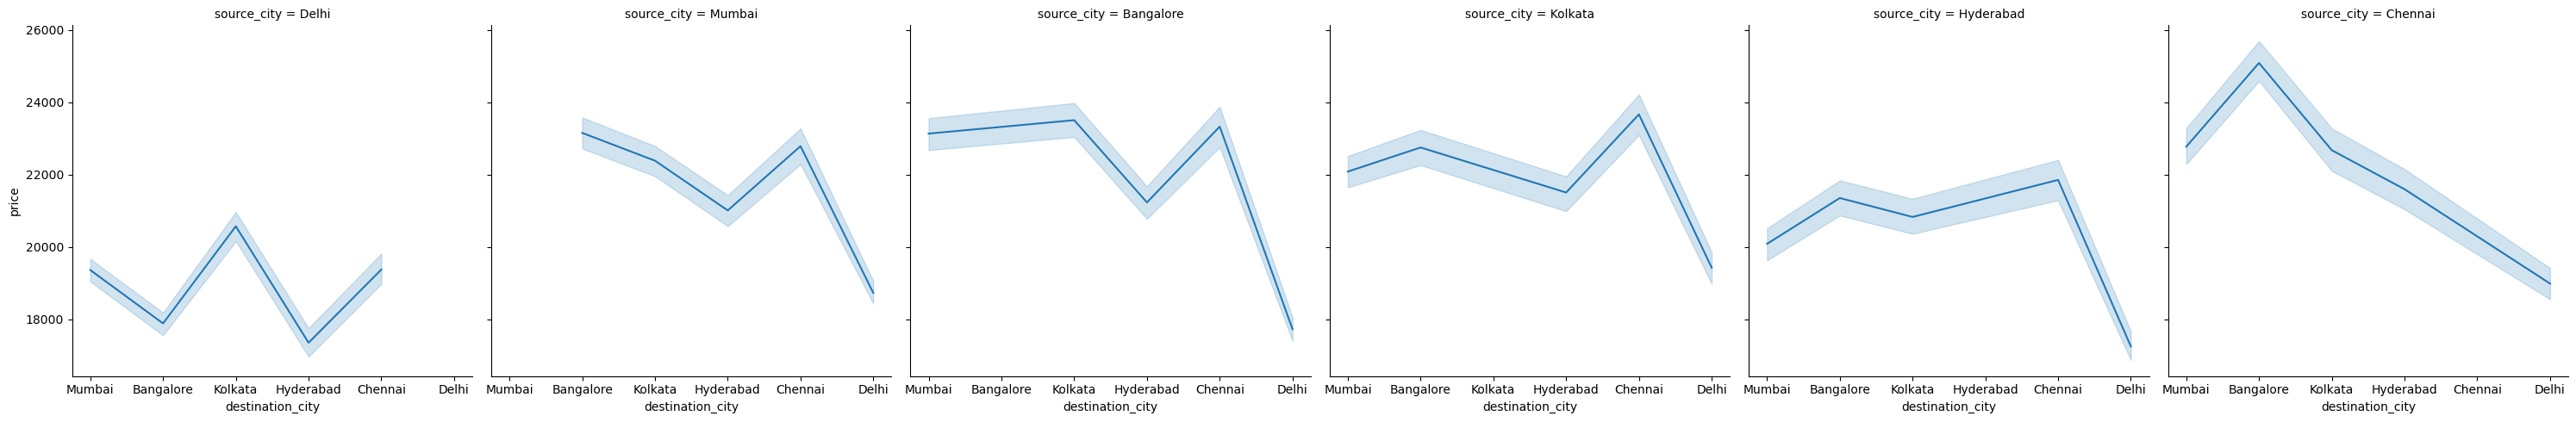

In [150]:
sns.relplot(x='destination_city', y='price', data=data, col='source_city',kind='line')
plt.show()

How is the price affected when tickets are boughts in just 1 or 2 days before departure

In [151]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [152]:
data['days_left'].nunique()

49

In [153]:
data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [154]:
#checking the mean Ticket price for different days_left
data.groupby('days_left')['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

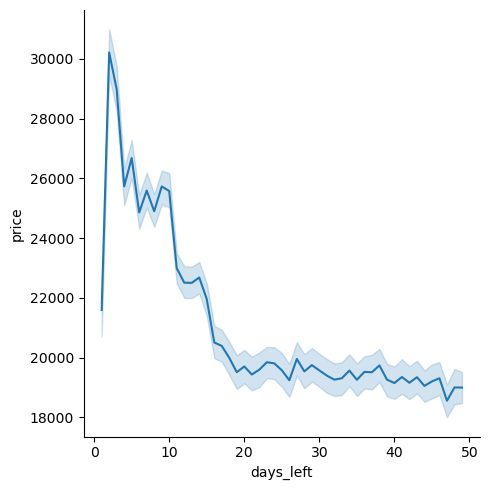

In [155]:
sns.relplot(x='days_left',y='price',kind='line',data=data)
plt.show()

How does the ticket price vary between economy  and business class

In [156]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [157]:
data['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [158]:
x=data[data['class']=='Economy']
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
206661,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697
206662,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709
206663,Vistara,UK-826,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640
206664,Vistara,UK-822,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640


In [159]:
x.price.mean()

6572.342383362527

In [162]:
y=data[data['class']=='Business']
y

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [163]:
y.price

206666    25612
206667    25612
206668    42220
206669    44450
206670    46690
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 93487, dtype: int64

In [166]:
y.price.mean()

52540.08112357868

what will be the average price of vistra airline for a flight from Delhi to hyderabad in Business Class?

In [167]:
data.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [180]:
new_data=data[(data['airline']=='Vistara') & (data['source_city']=='Delhi')&(data['destination_city']=='Hyderabad')&(data['class']=='Business')]
new_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...
221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [179]:
new_data['price'].mean()

47939.840361445786